# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [18]:
import tensorflow
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # no cycles - signal goes all the way through
from tensorflow.keras.layers import Dense       # All full mesh - connection between neurons to all neurons between layers
from tensorflow.keras.optimizers import SGD     # optimizer - stochastic gradient descend
from matplotlib import pyplot as plt

#### Load data

In [19]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
y_valid_labels = np.copy(y_valid)

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

In [22]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

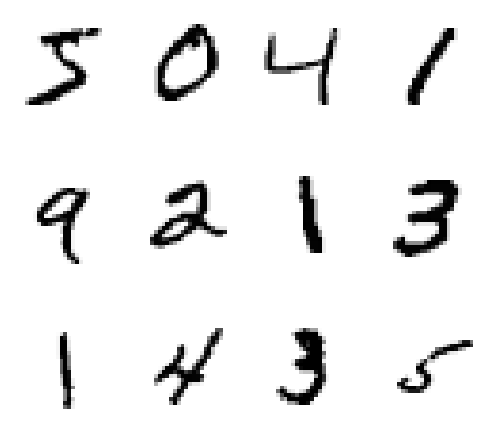

In [23]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
X_valid.shape

(10000, 28, 28)

In [25]:
y_valid.shape

(10000,)

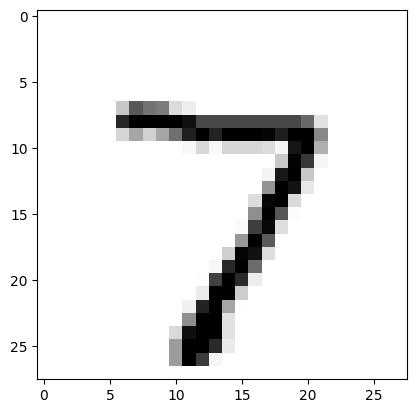

In [26]:
_ = plt.imshow(X_valid[0], cmap='Greys')

In [ ]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_valid[0]

7

#### Preprocess data

In [27]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [28]:
X_train /= 255
X_valid /= 255

In [ ]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [56]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

#### Configure model

## Loss Functions
- binary_crossentropy - Classsification with only 2 classes
- categorical_crossentropy - Classification with multiple classes
- mean_squared_error - Regression

In [57]:
# model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])       # 0.57 accuracy
# model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # 0.91 accuracy
# model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.5), metrics=['accuracy'])  # 0.98 accuracy but diffrence between training accuracy and validationa accuracy is big
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])    # 0.986 accuracy and validation is close enough

#### Train!

In [58]:
evolution = model.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
type(evolution)

Epoch 1/20
118/118 [==============================] - 1s 6ms/step - loss: 1.7449 - accuracy: 0.6285 - val_loss: 1.2597 - val_accuracy: 0.7713
Epoch 2/20
118/118 [==============================] - 0s 4ms/step - loss: 1.0152 - accuracy: 0.8116 - val_loss: 0.8069 - val_accuracy: 0.8459
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 0.7260 - accuracy: 0.8503 - val_loss: 0.6266 - val_accuracy: 0.8696
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.8667 - val_loss: 0.5311 - val_accuracy: 0.8827
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 0.5198 - accuracy: 0.8764 - val_loss: 0.4749 - val_accuracy: 0.8885
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.8824 - val_loss: 0.4349 - val_accuracy: 0.8955
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4380 - accuracy: 0.8869 - val_loss: 0.4078 - val_accuracy: 0.8976
Epoch 

keras.src.callbacks.History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


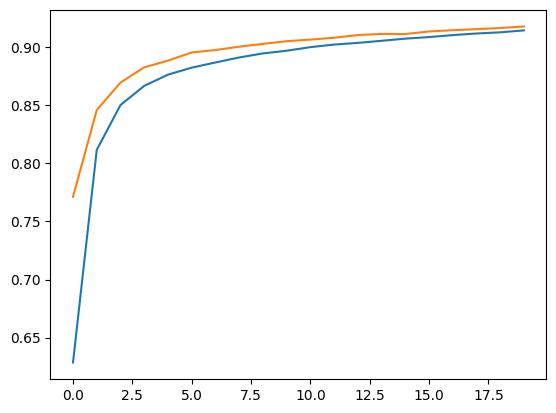

In [59]:
print(evolution.history.keys())
plt.plot(evolution.history['accuracy'])
plt.plot(evolution.history['val_accuracy'])

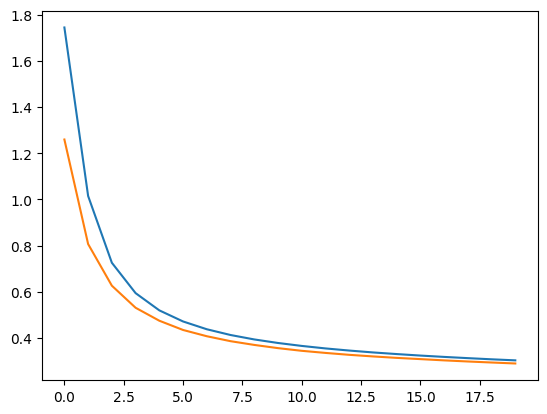

In [60]:
plt.plot(evolution.history['loss'])
plt.plot(evolution.history['val_loss'])

#### Evaluating model performance

In [61]:
print(X_valid.shape)
print(y_valid.shape)
# evaluate the model using the entire validation data set
model.evaluate(X_valid, y_valid)
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import confusion_matrix
#labels = [str(digit) for digit in range(10)]
#y_pred = np.array(y_predicted)
#full_cm = confusion_matrix(y_valid, y_pred)
#y_pred.shape

(10000, 784)
(10000, 10)
313/313 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9179


[0.2897818088531494, 0.917900025844574]

#### Performing inference

In [62]:
print(X_valid[0].shape)
valid_0 = X_valid[0].reshape(1, 784)
X_valid.shape

(784,)


(10000, 784)

In [63]:
# make a prediction with a single and entire data set
class_predict = model.predict(valid_0)
print(class_predict)
class_predicts = model.predict(X_valid)
print(class_predicts.shape)

1/1 [==============================] - 0s 42ms/step
[[3.1843764e-04 9.9225326e-06 2.6359406e-04 1.6929813e-03 1.5781818e-05
  1.9286243e-04 4.9890275e-07 9.9455041e-01 8.1145976e-05 2.8743774e-03]]
313/313 [==============================] - 0s 2ms/step
(10000, 10)


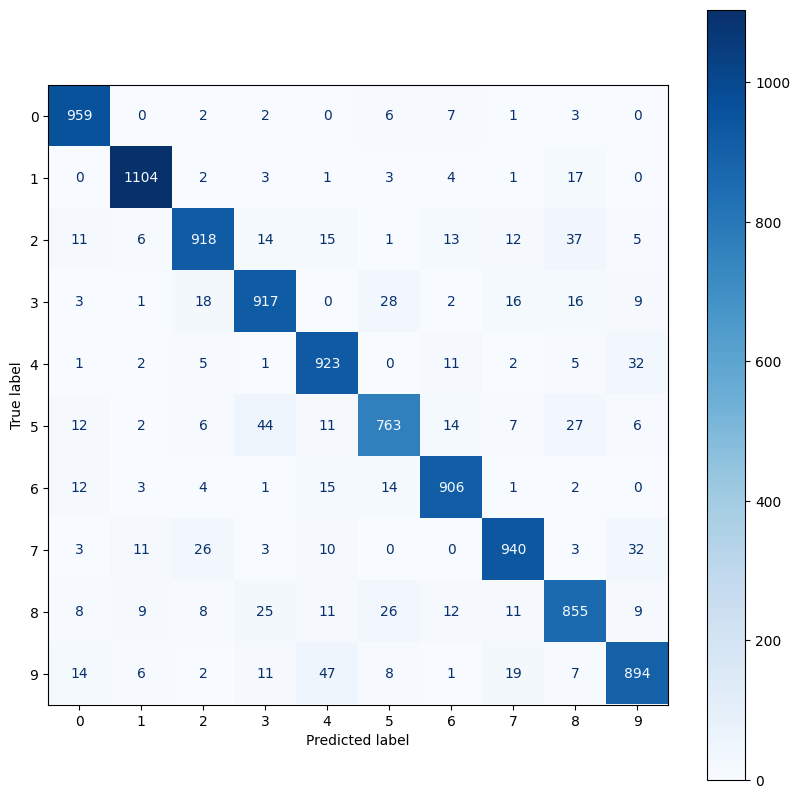

In [64]:
# Plot full confusion matrix for MNIST classification
# import CM object from sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# create labels - human readable
labels = [str(digit) for digit in range(10)]

# predicted labels based on the trained model
# change from the one-hot to human-readable class label
y_new = np.array(np.argmax(class_predicts, axis=1))

# create confusion matrix object, y_valid_labels - copy of the original data before reshaping
full_cm = confusion_matrix(y_valid_labels, y_new)

# plot the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [ ]:
## The predict_classes() method no longer exists in recent TensorFlow releases. Instead you could use:
# import numpy as np
# np.argmax(model.predict(valid_0), axis=-1)

## Task:
- test all batch sizes
```
[ 8, 16, 32, 64, 128, 256, 512 ]
```
- test 3 activtion functions
___
#### Due: 2 weeks

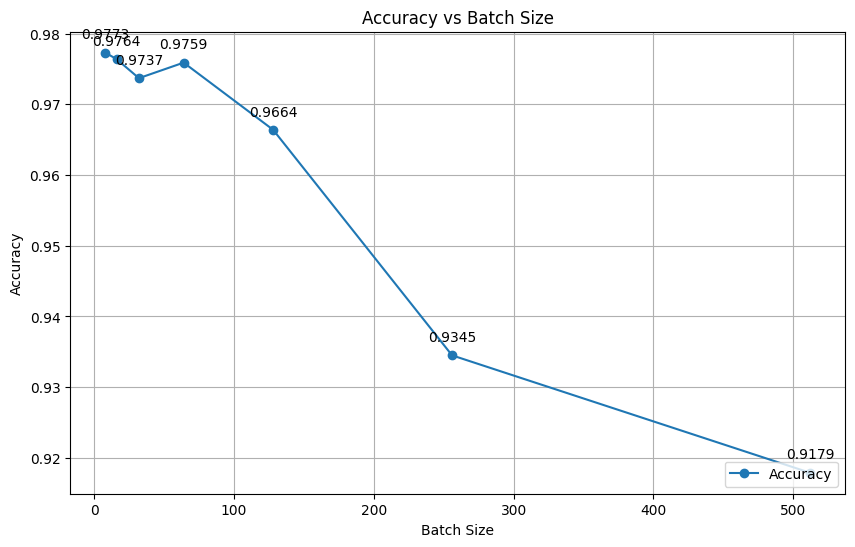

In [1]:
import matplotlib.pyplot as plt

# Data
batch_sizes = [512, 256, 128, 64, 32, 16, 8]
accuracies = [0.9179, 0.9345, 0.9664, 0.9759, 0.9737, 0.9764, 0.9773]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accuracies, marker='o', linestyle='-')

# Title and labels
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Add labels to data points
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.4f}', (batch_sizes[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add legend
plt.legend(['Accuracy'], loc='lower right')

# Show plot
plt.show()

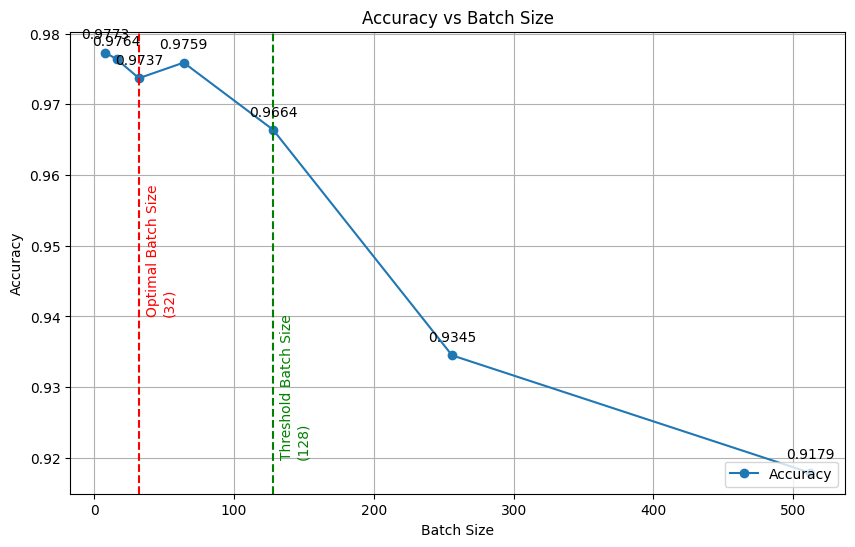

In [16]:
# Calculate change in accuracy from previous batch size

# Data
batch_sizes = [512, 256, 128, 64, 32, 16, 8]
accuracies = [0.9179, 0.9345, 0.9664, 0.9759, 0.9737, 0.9764, 0.9773]

# Calculate accuracy growth rate
batch_sizes_np = np.array(batch_sizes)
accuracies_np = np.array(accuracies)
accuracy_growth_rate = np.gradient(accuracies_np) / np.gradient(batch_sizes_np)

# Find the index where accuracy growth rate is highest
optimal_index = np.argmax(accuracy_growth_rate)
optimal_batch_size = batch_sizes[optimal_index]
optimal_accuracy = accuracies[optimal_index]

# Calculate the threshold covering at least 96% of the correct value
threshold = 0.96 * optimal_accuracy
index_below_threshold = next((i for i, acc in enumerate(accuracies) if acc >= threshold), None)
optimal_batch_size_threshold = batch_sizes[index_below_threshold]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accuracies, marker='o', linestyle='-')

# Title and labels
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Add labels to data points
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.4f}', (batch_sizes[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add legend
plt.legend(['Accuracy'], loc='lower right')

# Add vertical lines for both maximum accuracy and threshold
plt.axvline(x=optimal_batch_size, color='r', linestyle='--')
plt.text(optimal_batch_size + 5, optimal_accuracy - 0.015, f'Optimal Batch Size\n({optimal_batch_size})', rotation=90, color='r', verticalalignment='top')

plt.axvline(x=optimal_batch_size_threshold, color='g', linestyle='--')
plt.text(optimal_batch_size_threshold + 5, threshold - 0.015, f'Threshold Batch Size\n({optimal_batch_size_threshold})', rotation=90, color='g', verticalalignment='bottom')

# Show plot
plt.show()

In [14]:
batch_sizes = [512, 256, 128, 64, 32, 16, 8]
accuracies = [0.9179, 0.9345, 0.9664, 0.9759, 0.9737, 0.9764, 0.9773]

# Calculate accuracy changes
accuracy_changes = np.diff(accuracies)  # Difference between consecutive elements

# Print accuracy changes with corresponding batch sizes (except the last one)
for i, change in enumerate(accuracy_changes):
  print(f"Change in accuracy from {batch_sizes[i+1]} to {batch_sizes[i]}: {change}")

# Define a threshold for considering accuracy change insignificant
threshold = 0.001  # You can adjust this value based on your needs

# Identify potential threshold point (first change less than or equal to threshold)
potential_threshold_index = np.where(accuracy_changes <= threshold)[0][0] if len(accuracy_changes[accuracy_changes <= threshold]) > 0 else None

if potential_threshold_index is not None:
  potential_threshold_batch_size = batch_sizes[potential_threshold_index + 1]
  print(f"\nPotential threshold for insignificant accuracy change: Batch size {potential_threshold_batch_size} with accuracy {accuracies[potential_threshold_index + 1]}")
else:
  print("\nNo significant accuracy change threshold identified within the provided data.")

Change in accuracy from 256 to 512: 0.016599999999999948
Change in accuracy from 128 to 256: 0.03190000000000004
Change in accuracy from 64 to 128: 0.009499999999999953
Change in accuracy from 32 to 64: -0.0021999999999999797
Change in accuracy from 16 to 32: 0.0027000000000000357
Change in accuracy from 8 to 16: 0.0008999999999999009

Potential threshold for insignificant accuracy change: Batch size 32 with accuracy 0.9737


# Other Activation function

In [30]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(784,)))
model_relu.add(Dense(10, activation='softmax'))

In [31]:
model_tanh = Sequential()
model_tanh.add(Dense(64, activation='tanh', input_shape=(784,)))
model_tanh.add(Dense(10, activation='softmax'))

In [32]:
model_relu.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])
model_tanh.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

In [33]:
evolution_relu = model_relu.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
evolution_tanh = model_tanh.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3847 - accuracy: 0.8915 - val_loss: 0.2431 - val_accuracy: 0.9308
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2077 - accuracy: 0.9413 - val_loss: 0.1797 - val_accuracy: 0.9475
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1614 - accuracy: 0.9531 - val_loss: 0.1484 - val_accuracy: 0.9545
Epoch 4/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1346 - accuracy: 0.9612 - val_loss: 0.1287 - val_accuracy: 0.9623
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1160 - accuracy: 0.9664 - val_loss: 0.1198 - val_accuracy: 0.9643
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1025 - accuracy: 0.9707 - val_loss: 0.1103 - val_accuracy: 0.9664
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0918 - accuracy: 0.9733 - val_loss: 0.1008 - val_accuracy: 0.9697
Epoch 

In [40]:
def plot_stats(evolution):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots in one row

    # Plotting accuracy
    axs[0].plot(evolution.history['accuracy'], color='blue', label='Training Accuracy')
    axs[0].plot(evolution.history['val_accuracy'], color='red', label='Validation Accuracy')

    # Adding labels and title for accuracy subplot
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].legend()  # Add legend to distinguish between training and validation accuracy
    axs[0].grid(True)

    # Plotting loss
    axs[1].plot(evolution.history['loss'], color='blue', label='Training Loss')
    axs[1].plot(evolution.history['val_loss'], color='red', label='Validation Loss')

    # Adding labels and title for loss subplot
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].legend()  # Add legend to distinguish between training and validation loss

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.grid()
    # Show the plot
    plt.show()

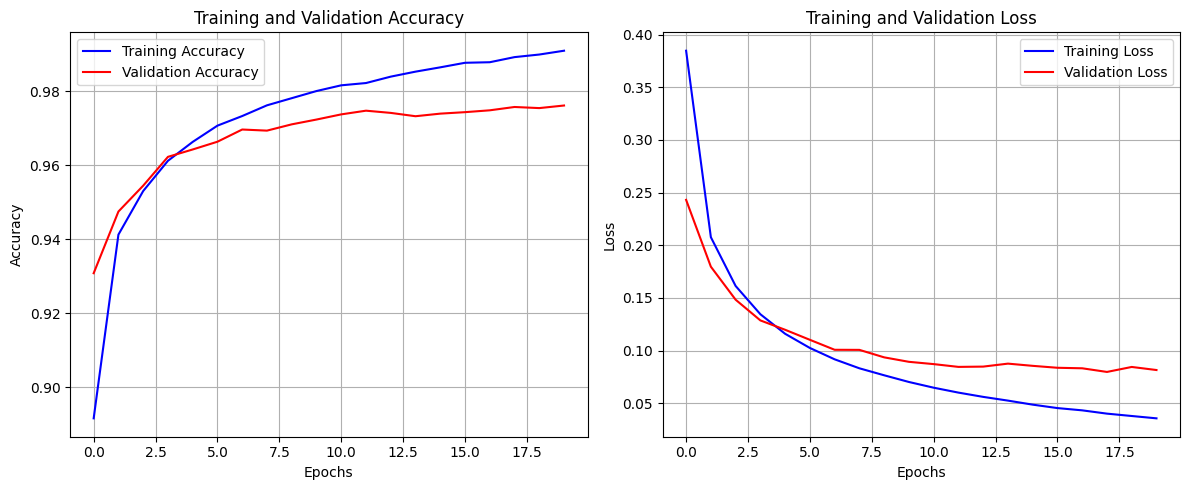

In [41]:
plot_stats(evolution_relu)

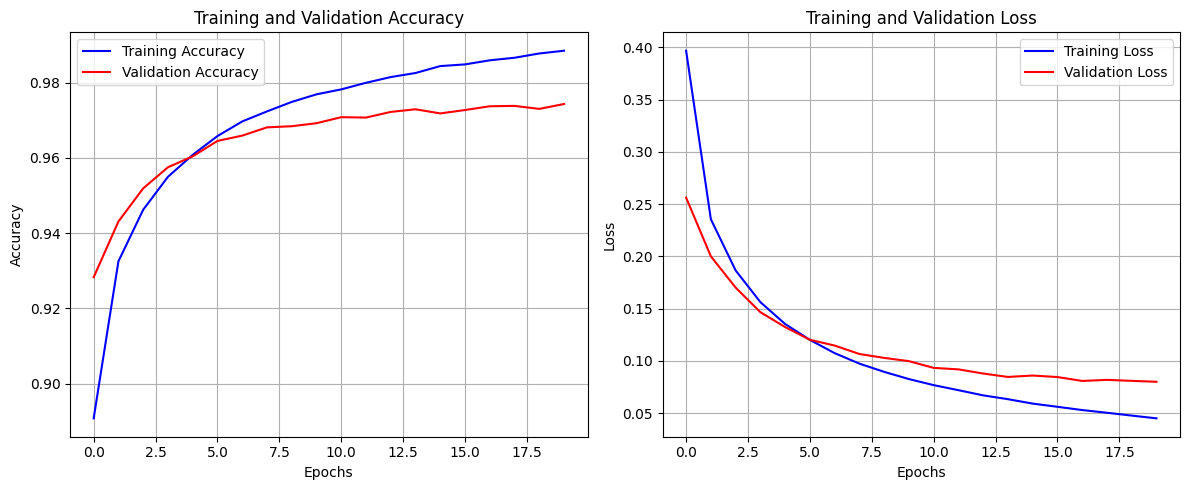

In [42]:
plot_stats(evolution_tanh)

In [43]:
# evaluate the model using the entire validation data set
model_relu.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9762


[0.08160426467657089, 0.9761999845504761]

In [44]:
# evaluate the model using the entire validation data set
model_tanh.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9743


[0.07998695224523544, 0.9743000268936157]

1/1 [==============================] - 0s 89ms/step
[[4.0758437e-08 9.0916803e-09 2.1043088e-06 2.8662533e-05 3.0413130e-10
  1.9201883e-07 6.1064603e-13 9.9996674e-01 1.2164863e-06 1.0631156e-06]]
313/313 [==============================] - 1s 2ms/step
(10000, 10)


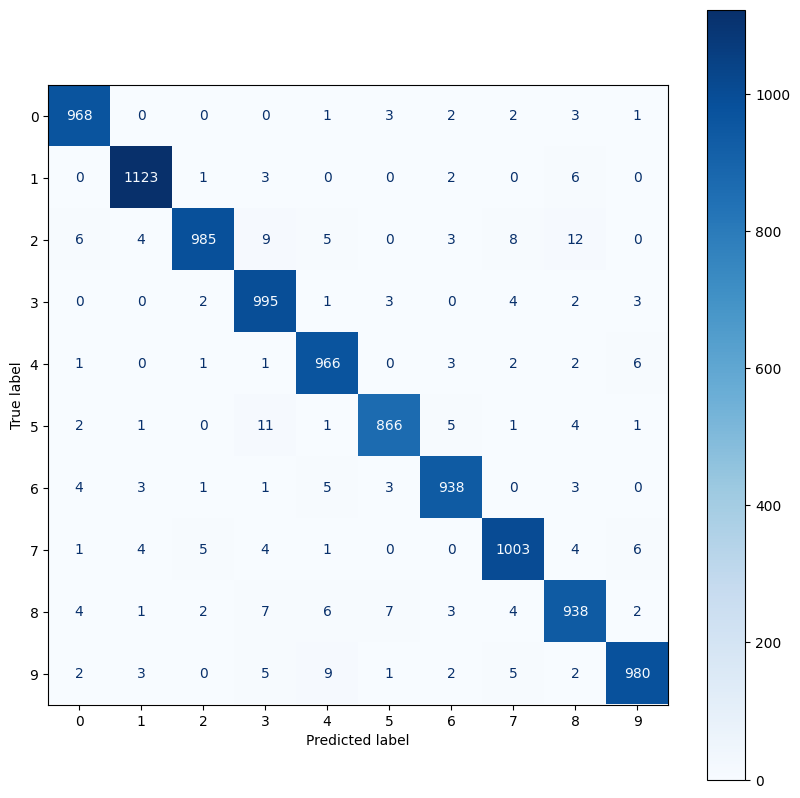

In [45]:
valid_0 = X_valid[0].reshape(1, 784)

# make a prediction with a single and entire data set
class_predict = model_relu.predict(valid_0)
print(class_predict)
class_predicts = model_relu.predict(X_valid)
print(class_predicts.shape)
# Plot full confusion matrix for MNIST classification
# import CM object from sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# create labels - human readable
labels = [str(digit) for digit in range(10)]

# predicted labels based on the trained model
# change from the one-hot to human-readable class label
y_new = np.array(np.argmax(class_predicts, axis=1))

# create confusion matrix object, y_valid_labels - copy of the original data before reshaping
full_cm = confusion_matrix(y_valid_labels, y_new)

# plot the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

1/1 [==============================] - 0s 129ms/step
[[7.3087415e-07 1.9707409e-09 1.3061991e-05 2.8028493e-04 3.5598241e-08
  3.0923644e-07 1.2900023e-10 9.9968803e-01 8.9294899e-06 8.5949287e-06]]
313/313 [==============================] - 1s 3ms/step
(10000, 10)


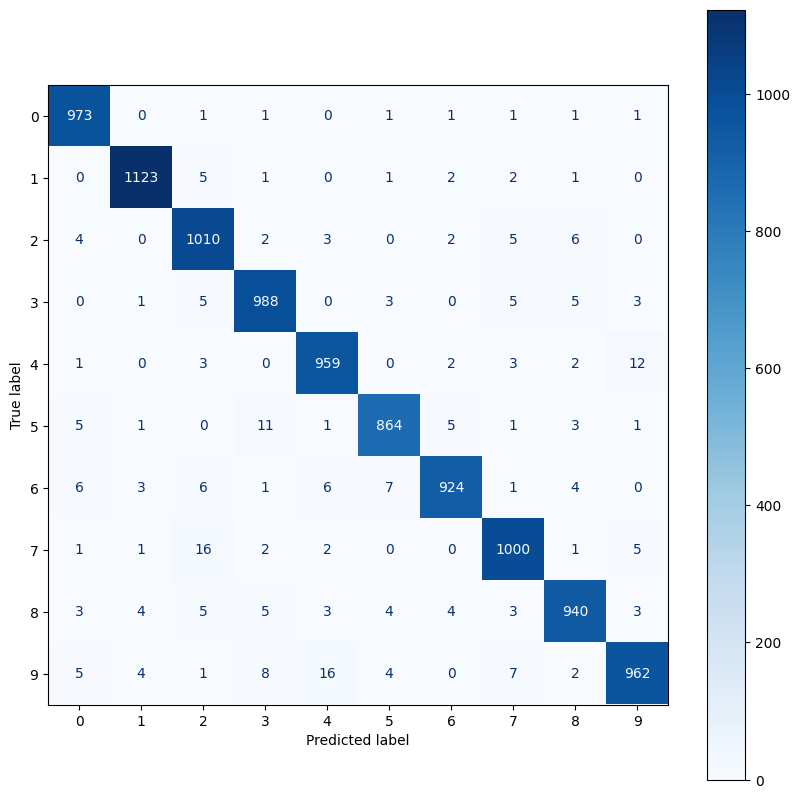

In [46]:
valid_0 = X_valid[0].reshape(1, 784)

# make a prediction with a single and entire data set
class_predict = model_tanh.predict(valid_0)
print(class_predict)
class_predicts = model_tanh.predict(X_valid)
print(class_predicts.shape)
# Plot full confusion matrix for MNIST classification
# import CM object from sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# create labels - human readable
labels = [str(digit) for digit in range(10)]

# predicted labels based on the trained model
# change from the one-hot to human-readable class label
y_new = np.array(np.argmax(class_predicts, axis=1))

# create confusion matrix object, y_valid_labels - copy of the original data before reshaping
full_cm = confusion_matrix(y_valid_labels, y_new)

# plot the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=full_cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()